In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
import time
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from kneed import KneeLocator
from imblearn.over_sampling import RandomOverSampler, SMOTE
import seaborn as sns

In [2]:
RANDOM_STATE = 10
seeds = [1, 10, 25, 50, 101]

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
wq_X = wq_df.data.features 
wq_y = wq_df.data.targets 

# Breast Cancer Data
# fetch dataset 
bc_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
bc_X = bc_df.data.features 
bc_y = bc_df.data.targets 

In [4]:
# Standardized data
scaler = MinMaxScaler()
wq_scaled = scaler.fit_transform(wq_X)
bc_scaled = scaler.fit_transform(bc_X)

## Choose K Value

### Elbow Method

#### Wine quality

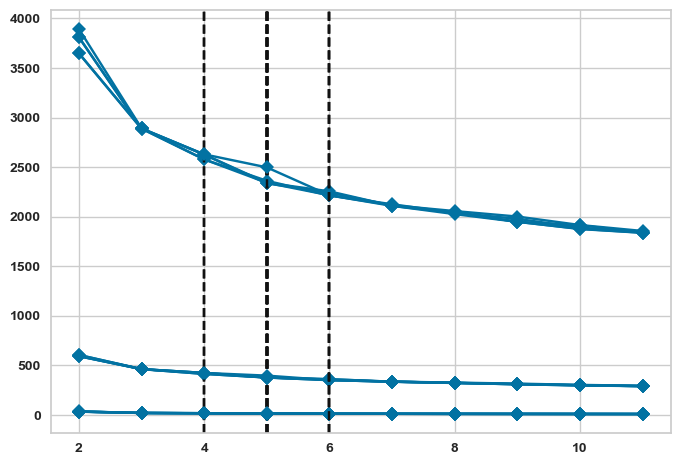

In [25]:
# Distance Metrics Comparisons
d1 = []
d2 = []
d3 = []


for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
    visualizer.fit(wq_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    distortion1 = visualizer.k_scores_
    d1.append(distortion1)

    visualizer1 = KElbowVisualizer(model, k=(2,12), distance_metric='manhattan', timings=False)
    visualizer1.fit(wq_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    distortion2 = visualizer1.k_scores_
    d2.append(distortion2)

    visualizer2 = KElbowVisualizer(model, k=(2,12), distance_metric='cosine', timings=False)
    visualizer2.fit(wq_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    distortion3 = visualizer2.k_scores_
    d3.append(distortion3)

distortion1 = np.mean(d1, axis=0)
distortion2 = np.mean(d2, axis=0)
distortion3 = np.mean(d3, axis=0)
d_elbow1 = KneeLocator(np.arange(2, 12), distortion1, curve='convex', direction='decreasing').knee
d_elbow2 = KneeLocator(np.arange(2, 12), distortion2, curve='convex', direction='decreasing').knee
d_elbow3 = KneeLocator(np.arange(2, 12), distortion3, curve='convex', direction='decreasing').knee

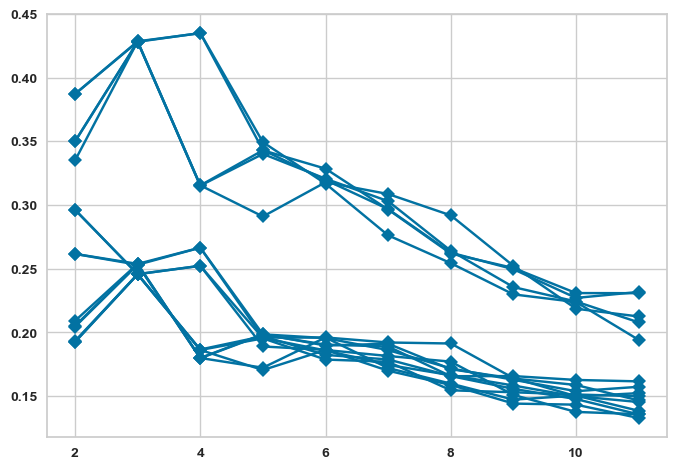

In [26]:
# Distance Metrics Comparisons
s1 = []
s2 = []
s3 = []


for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(wq_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    sil1 = visualizer.k_scores_
    s1.append(sil1)

    visualizer1 = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, distance_metric='manhattan', timings=False)
    visualizer1.fit(wq_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    sil2 = visualizer1.k_scores_
    s2.append(sil2)

    visualizer2 = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, distance_metric='cosine', timings=False)
    visualizer2.fit(wq_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    sil3 = visualizer2.k_scores_
    s3.append(sil3)
    
sil1 = np.mean(s1, axis=0)
sil2 = np.mean(s2, axis=0)
sil3 = np.mean(s3, axis=0)

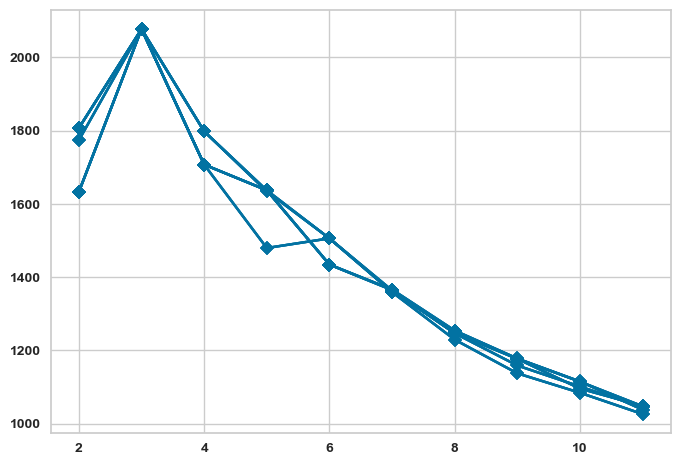

In [27]:
# Distance Metrics Comparisons
c1 = []
c2 = []
c3 = []

for seed in seeds:
    model = KMeans(random_state=seed,n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(wq_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    ch1 = visualizer.k_scores_
    c1.append(ch1)

    visualizer1 = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, distance_metric='manhattan', timings=False)
    visualizer1.fit(wq_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    ch2 = visualizer1.k_scores_
    c2.append(ch2)

    visualizer2 = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, distance_metric='cosine', timings=False)
    visualizer2.fit(wq_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    ch3 = visualizer2.k_scores_
    c3.append(ch3)

ch1 = np.mean(c1, axis=0)
ch2 = np.mean(c2, axis=0)
ch3 = np.mean(c3, axis=0)

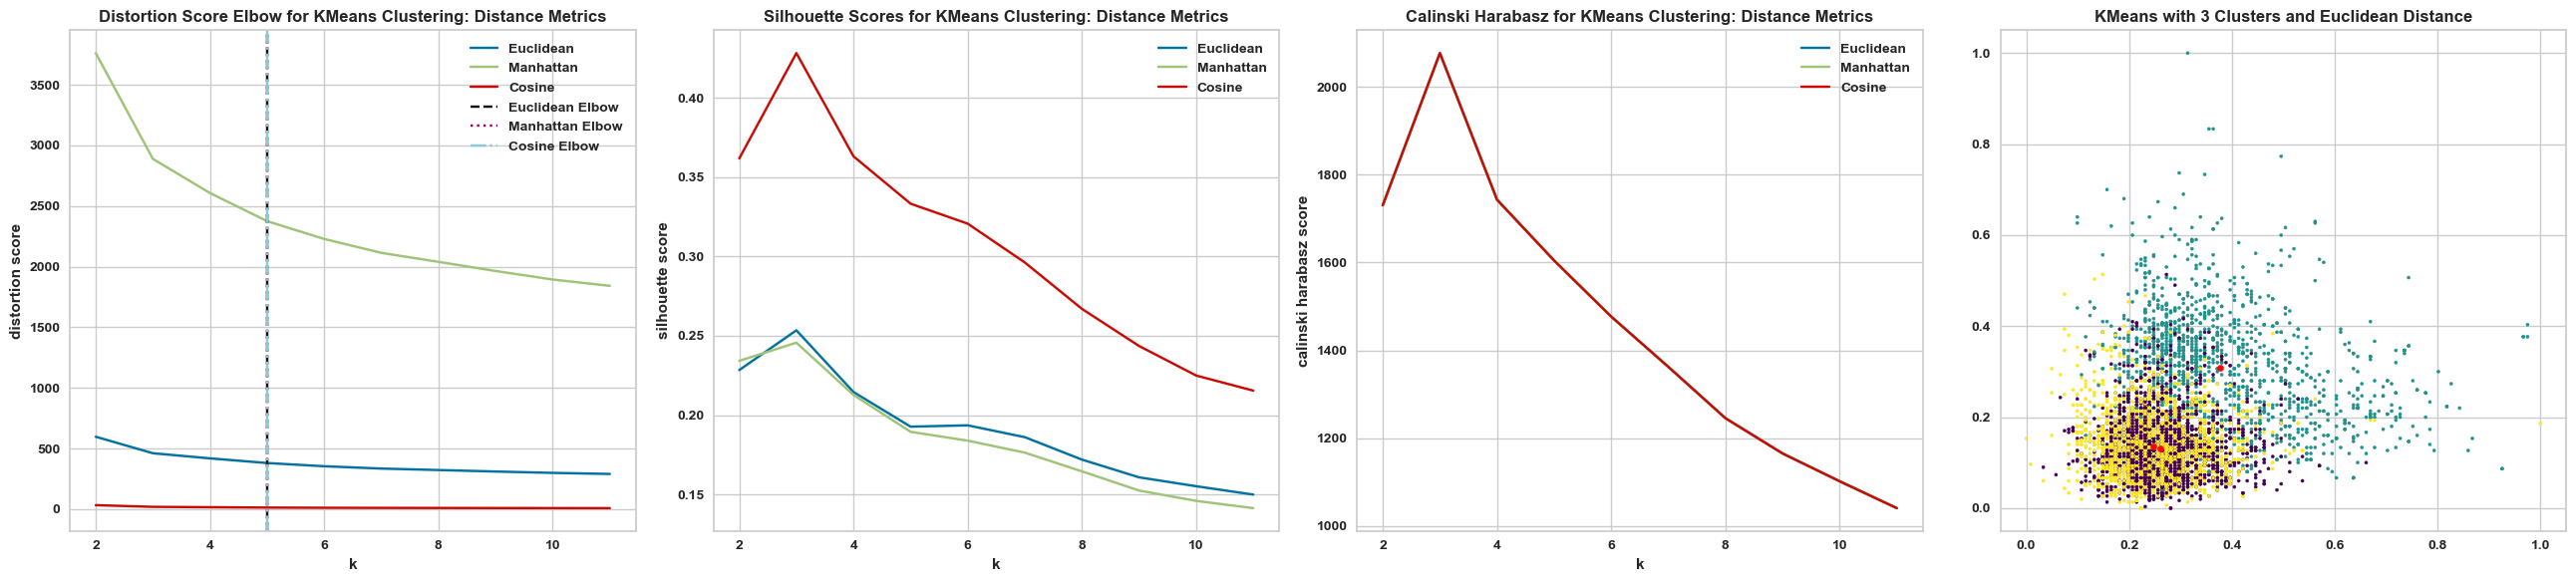

In [28]:
# Combined subplots
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}
k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(26, 6))
ax1.plot(k_range, distortion1, label='Euclidean')
ax1.plot(k_range, distortion2, label='Manhattan')
ax1.plot(k_range, distortion3, label='Cosine')
ax1.axvline(x = d_elbow1, color='k', label = 'Euclidean Elbow', linestyle='--')
ax1.axvline(x = d_elbow2, color='m', label = 'Manhattan Elbow', linestyle=':')
ax1.axvline(x = d_elbow3, color='c', label = 'Cosine Elbow', linestyle='-.')
ax1.set_title('Distortion Score Elbow for KMeans Clustering: Distance Metrics', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)
ax1.legend(loc='best', prop=legend_properties)

k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ax2.plot(k_range, sil1, label='Euclidean')
ax2.plot(k_range, sil2, label='Manhattan')
ax2.plot(k_range, sil3, label='Cosine')
ax2.set_title('Silhouette Scores for KMeans Clustering: Distance Metrics', weight='bold')
ax2.set_ylabel('silhouette score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)
ax2.legend(loc='best', prop=legend_properties)

ax3.plot(k_range, ch1, label='Euclidean')
ax3.plot(k_range, ch2, label='Manhattan')
ax3.plot(k_range, ch3, label='Cosine')
ax3.set_title('Calinski Harabasz for KMeans Clustering: Distance Metrics', weight='bold')
ax3.set_ylabel('calinski harabasz score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)
ax3.legend(loc='best', prop=legend_properties)

kmeans = KMeans(n_clusters=3, random_state=seed, n_init='auto')
kmeans.fit(wq_scaled)
y_kmeans = kmeans.predict(wq_scaled)
centers = kmeans.cluster_centers_

ax4.scatter(wq_scaled[:, 0], wq_scaled[:, 1], c=y_kmeans, cmap='viridis', s=5)
ax4.scatter(centers[:, 0], centers[:, 1], c='red', s=20)
ax4.set_title('KMeans with 3 Clusters and Euclidean Distance', weight='bold')

plt.tight_layout()
plt.savefig('plots/kmeans_combined/kmeans_wq_combined.png', dpi=1200)
plt.show()

#### Analysis

In [29]:
quality = list(wq_y['quality'])
        
        
ri = metrics.rand_score(quality, y_kmeans)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(quality, y_kmeans)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(quality, y_kmeans) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(quality, y_kmeans)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(quality, y_kmeans)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(quality, y_kmeans)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(quality, y_kmeans)
print('V Measure Score: ', v)

Rand Index:  0.5790990783165554
Adjusted Rand Index:  0.06214842541558963
Adjusted Mutual Info Score:  0.07962232851321359
Normalized Mutual Info Score:  0.08037810475912113
Homogeneity Score:  0.07398133325931366
Completeness Score:  0.0879857647978335
V Measure Score:  0.08037810475912113


In [30]:
print(quality)
print(y_kmeans)

[5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5, 5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5, 5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5, 6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 6, 7, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 

### Breast Cancer

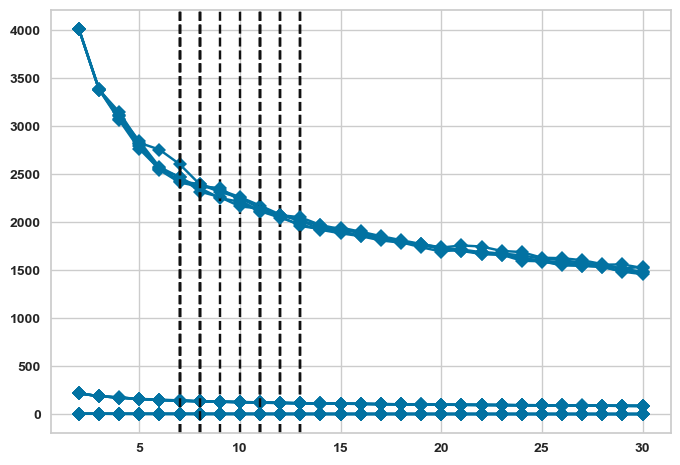

In [11]:
# Distance Metrics Comparisons
d1 = []
d2 = []
d3 = []


for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), timings=False)
    visualizer.fit(bc_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    distortion1 = visualizer.k_scores_
    d1.append(distortion1)

    visualizer1 = KElbowVisualizer(model, k=(2,31), distance_metric='manhattan', timings=False)
    visualizer1.fit(bc_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    distortion2 = visualizer1.k_scores_
    d2.append(distortion2)

    visualizer2 = KElbowVisualizer(model, k=(2,31), distance_metric='cosine', timings=False)
    visualizer2.fit(bc_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    distortion3 = visualizer2.k_scores_
    d3.append(distortion3)

distortion1 = np.mean(d1, axis=0)
distortion2 = np.mean(d2, axis=0)
distortion3 = np.mean(d3, axis=0)
d_elbow1 = KneeLocator(np.arange(2, 31), distortion1, curve='convex', direction='decreasing').knee
d_elbow2 = KneeLocator(np.arange(2, 31), distortion2, curve='convex', direction='decreasing').knee
d_elbow3 = KneeLocator(np.arange(2, 31), distortion3, curve='convex', direction='decreasing').knee

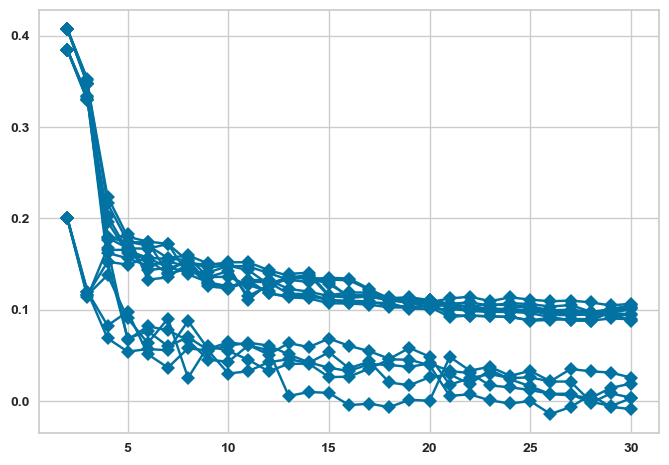

In [12]:
# Distance Metrics Comparisons
s1 = []
s2 = []
s3 = []


for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(bc_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    sil1 = visualizer.k_scores_
    s1.append(sil1)

    visualizer1 = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, distance_metric='manhattan', timings=False)
    visualizer1.fit(bc_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    sil2 = visualizer1.k_scores_
    s2.append(sil2)

    visualizer2 = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, distance_metric='cosine', timings=False)
    visualizer2.fit(bc_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    sil3 = visualizer2.k_scores_
    s3.append(sil3)
    
sil1 = np.mean(s1, axis=0)
sil2 = np.mean(s2, axis=0)
sil3 = np.mean(s3, axis=0)

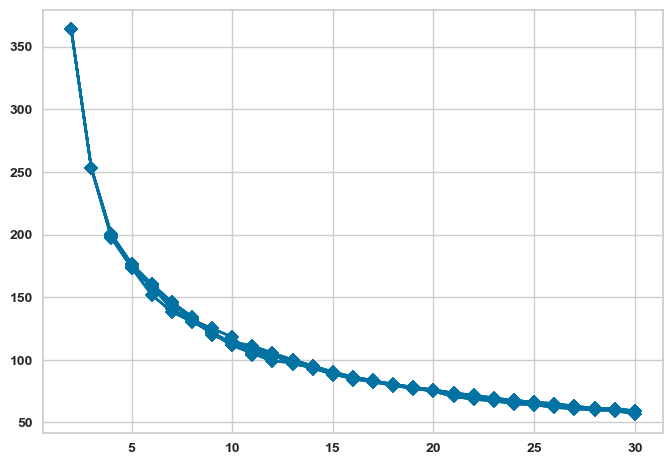

In [13]:
# Distance Metrics Comparisons
c1 = []
c2 = []
c3 = []

for seed in seeds:
    model = KMeans(random_state=seed,n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(bc_scaled)
#     print('Euclidean: ', visualizer.k_scores_)
    ch1 = visualizer.k_scores_
    c1.append(ch1)

    visualizer1 = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, distance_metric='manhattan', timings=False)
    visualizer1.fit(bc_scaled)
#     print('Manhattan: ', visualizer1.k_scores_)
    ch2 = visualizer1.k_scores_
    c2.append(ch2)

    visualizer2 = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, distance_metric='cosine', timings=False)
    visualizer2.fit(bc_scaled)
#     print('Cosine: ', visualizer2.k_scores_)
    ch3 = visualizer2.k_scores_
    c3.append(ch3)

ch1 = np.mean(c1, axis=0)
ch2 = np.mean(c2, axis=0)
ch3 = np.mean(c3, axis=0)

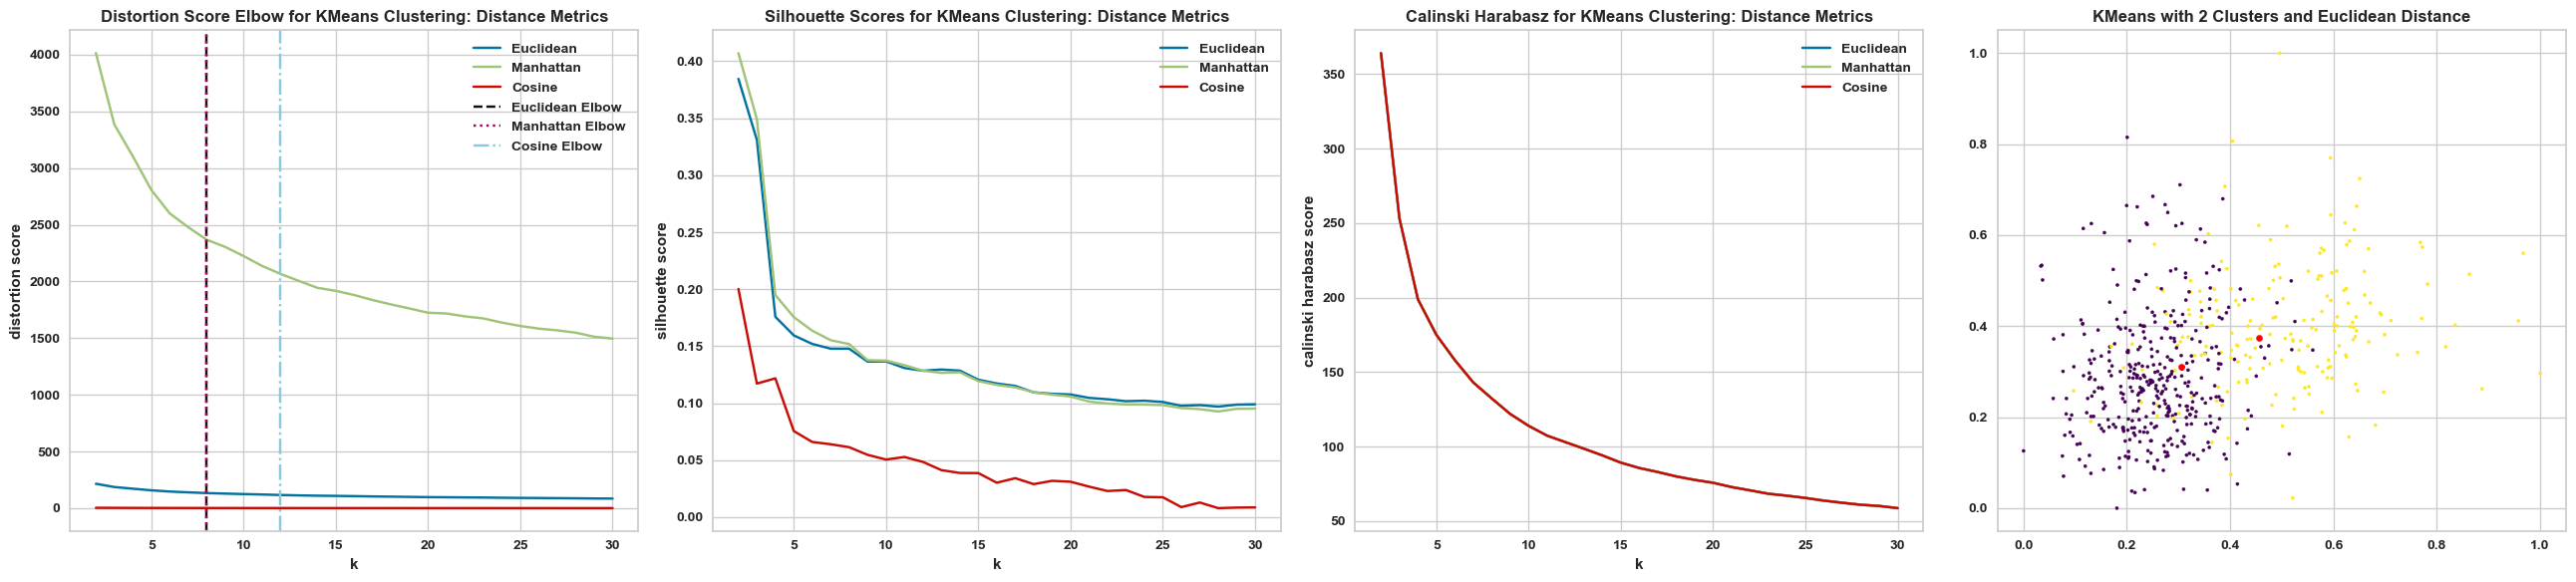

In [14]:
# Combined subplots
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}
k_range = np.arange(2,31)
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(26, 6))
ax1.plot(k_range, distortion1, label='Euclidean')
ax1.plot(k_range, distortion2, label='Manhattan')
ax1.plot(k_range, distortion3, label='Cosine')
ax1.axvline(x = d_elbow1, color='k', label = 'Euclidean Elbow', linestyle='--')
ax1.axvline(x = d_elbow2, color='m', label = 'Manhattan Elbow', linestyle=':')
ax1.axvline(x = d_elbow3, color='c', label = 'Cosine Elbow', linestyle='-.')
ax1.set_title('Distortion Score Elbow for KMeans Clustering: Distance Metrics', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)
ax1.legend(loc='best', prop=legend_properties)

ax2.plot(k_range, sil1, label='Euclidean')
ax2.plot(k_range, sil2, label='Manhattan')
ax2.plot(k_range, sil3, label='Cosine')
ax2.set_title('Silhouette Scores for KMeans Clustering: Distance Metrics', weight='bold')
ax2.set_ylabel('silhouette score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)
ax2.legend(loc='best', prop=legend_properties)


ax3.plot(k_range, ch1, label='Euclidean')
ax3.plot(k_range, ch2, label='Manhattan')
ax3.plot(k_range, ch3, label='Cosine')
ax3.set_title('Calinski Harabasz for KMeans Clustering: Distance Metrics', weight='bold')
ax3.set_ylabel('calinski harabasz score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)
ax3.legend(loc='best', prop=legend_properties)

ys = []
cs = []
for seed in seeds:
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(bc_scaled)
    y_kmeans = kmeans.predict(bc_scaled)
    ys.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs.append(centers)

y_kmeans = np.round(np.mean(ys, axis=0))
centers = np.mean(cs, axis=0)
ax4.scatter(bc_scaled[:, 0], bc_scaled[:, 1], c=y_kmeans, cmap='viridis', s=5)
ax4.scatter(centers[:, 0], centers[:, 1], c='red', s=20)
ax4.set_title('KMeans with 2 Clusters and Euclidean Distance', weight='bold')


plt.tight_layout()
plt.savefig('plots/kmeans_combined/kmeans_bc_combined.png', dpi=1200)
plt.show()

#### Analysis

In [15]:
print(len(y_kmeans))

569


In [16]:
# bc_df = pd.DataFrame(bc_scaled)
# bc_df['Cluster'] = y_kmeans
# sns.pairplot(bc_df, hue="Cluster", palette='rainbow')

In [17]:
diagnosis = list(bc_y['Diagnosis'])
for i in range(len(diagnosis)):
    if diagnosis[i] == 'M':
        diagnosis[i] = 1
    else:
        diagnosis[i] = 0
        
        
ri = metrics.rand_score(diagnosis, y_kmeans)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(diagnosis, y_kmeans)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(diagnosis, y_kmeans) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(diagnosis, y_kmeans)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(diagnosis, y_kmeans)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(diagnosis, y_kmeans)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(diagnosis, y_kmeans)
print('V Measure Score: ', v)

Rand Index:  0.8660362880269313
Adjusted Rand Index:  0.7301749027614344
Adjusted Mutual Info Score:  0.6225724776699423
Normalized Mutual Info Score:  0.6230860242027794
Homogeneity Score:  0.6114713227224743
Completeness Score:  0.6351505041324654
V Measure Score:  0.6230860242027794


In [18]:
print(diagnosis)
print(y_kmeans)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 